# Install Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dropout

from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

C:\Users\Robinhood\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Loading MNIST Dataset

In [2]:
mnist=keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data ()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# Reshape Data From 3-D array into 2-D array
X_train=X_train.reshape(60000, 784)
X_test=X_test.reshape(10000, 784)

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()

# Fit and Transforming training Dataset
X_train=minmax.fit_transform(X_train)

# Transforming Dataset
X_test=minmax.transform(X_test)

print('Number of unique classes: ', len(np.unique(y_train)))
print('Classes:', np.unique(y_train))

C:\Users\Robinhood\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


Number of unique classes:  10
Classes: [0 1 2 3 4 5 6 7 8 9]


# Data Visualization

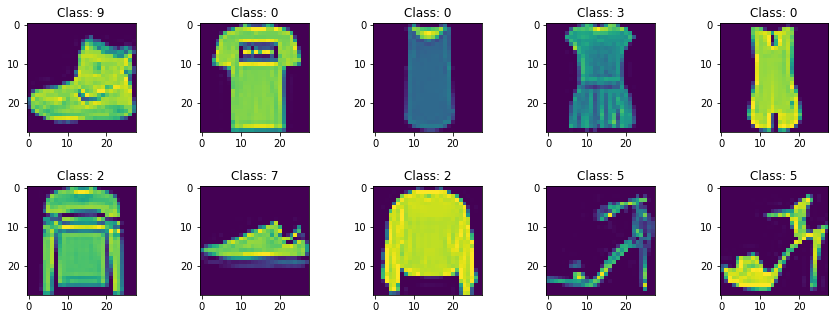

In [4]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,5))
ax=axes.ravel()
for i in range(10):
    ax[i].imshow(X_train[i].reshape(28,28))
    ax[i].title.set_text('Class: ' + str(y_train[i]))
plt.subplots_adjust(hspace=0.5)
plt.show()

# Building an ANN model with 1 Dense Layer

In [5]:
model=Sequential()

# Add 1st Hidden Layer
model.add(Dense(input_dim =X_train.shape[1], units=256, kernel_initializer='uniform', activation='relu'))

# Add Output Layer
model.add(Dense(units=10, kernel_initializer='uniform', activation='softmax'))

# Compile the neural network
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


# Training an ANN Model

In [6]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs=25, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/25
48000/48000 [==============================] - 13s 276us/step - loss: 0.5097 - acc: 0.8187 - val_loss: 0.4038 - val_acc: 0.8555
Epoch 2/25
48000/48000 [==============================] - 10s 208us/step - loss: 0.3764 - acc: 0.8634 - val_loss: 0.3540 - val_acc: 0.8730
Epoch 3/25
48000/48000 [==============================] - 9s 197us/step - loss: 0.3351 - acc: 0.8764 - val_loss: 0.3498 - val_acc: 0.8760
Epoch 4/25
48000/48000 [==============================] - 9s 185us/step - loss: 0.3106 - acc: 0.8856 - val_loss: 0.3384 - val_acc: 0.8758
Epoch 5/25
48000/48000 [==============================] - 9s 185us/step - loss: 0.2894 - acc: 0.8917 - val_loss: 0.3339 - val_acc: 0.8772
Epoch 6/25
48000/48000 [==============================] - 9s 185us/step - loss: 0.2752 - acc: 0.8981 - val_loss: 0.3227 - val_acc: 0.8854
Epoch 7/25
48000/48000 [==============================] - 9s 186us/step 

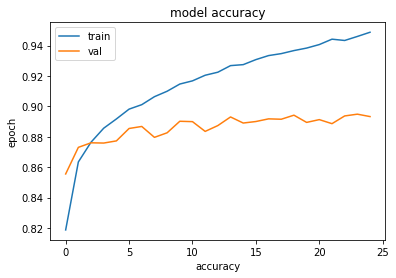

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

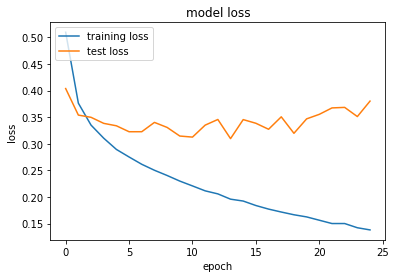

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training loss', 'test loss'], loc='upper left')
plt.show()

# Accuracy of the Dataset

In [9]:
_,accuracy=model.evaluate(X_train, y_train)
print("Accuracy:%.2f"%(accuracy*100))

60000/60000 [==============================] - 2s 36us/step
Accuracy:93.96


# Calculating F-1 SCORE

In [10]:
test_loss=model.evaluate(X_test, y_test, verbose=0)

# Calculate evaluation Parameters
f1=f1_score(y_test, model.predict_classes(X_test), average='micro')

stats=pd.DataFrame({'Test accuracy':
                   round(test_loss[1]*100,3),
                   'F1 Score' : round(f1,3),
                   'Total Loss': round(test_loss[0],3)},
                  index=[0])

display(stats)

,Test accuracy,F1 Score,Total Loss
0,88.64,0.886,0.409
